# TSDF

https://pcl.readthedocs.io/projects/tutorials/en/master/using_kinfu_large_scale.html

You may be wondering: “What is the difference between a TSDF cloud and a normal point cloud?” 
Well, a TSDF cloud is a point cloud. However, the TSDF cloud makes use of how the data is stored 
within GPU at KinFu runtime.

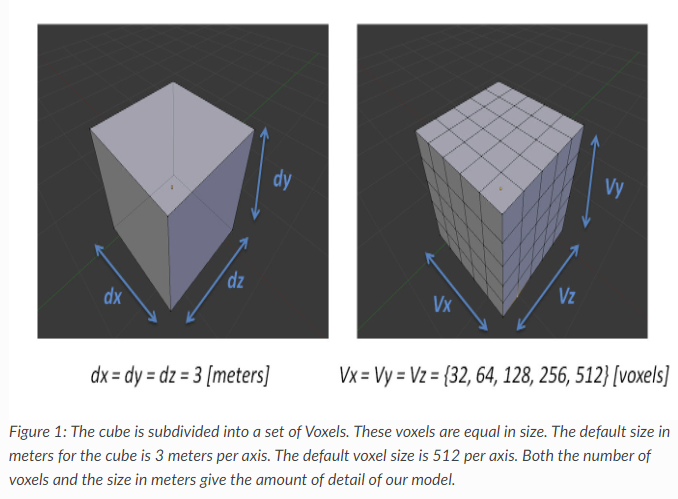

As you may already know, the way in which the TSDF volume is stored in GPU is a voxel grid. KinFu subdivides the physical space of the cube (e.g. 3 meters) into a voxel grid with a certain number of voxels per axis (say, 512 voxels per axis). The size in meters of the cube and the number of voxels give us the resolution of our cube. The quality of the model is proportional to these two parameters. However, modifying them affects directly the memory footprint for our TSDF volume in GPU. Further information on these properties can be found in the relevant papers.

At the time of data extraction, the grid is traversed from front to back, and the TSDF values are checked for each voxel. In the figure below, you may notice that the values range from -1 to 1.

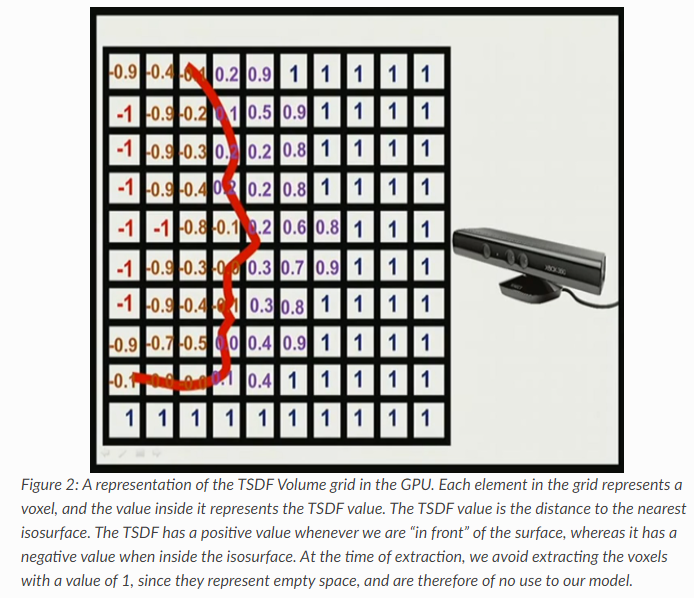

Since we want to minimize the required bandwidth between GPU and CPU, we will only extract the voxels with a TSDF value in the range [-1, 0.98]. We avoid extracting voxels with a value of 1 because they represent empty space. In this way we ensure that we only extract those voxels that are close to the isosurface. The TSDF cloud is not in meters. The X,Y,Z coordinates for each of the extracted points correspond to the voxel indices with respect to the world model.

As mentioned above, the TSDF cloud is a section of the TSDF volume grid; which is why the points are equally-spaced and uniformly-distributed. This can be observed when we zoom in the point cloud.


In [17]:
import numpy as np
x = np.linspace(-1,1,10)
y = np.linspace(-1,1,10)
z = np.linspace(-1,1,10)

xv,yv,az = np.meshgrid(x,y,z)
xv.shape

(10, 10, 10)